# Inicialización

William Fabian Arevalo Rodriguez

In [1]:
from skimage import io
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_peaks, corner_harris,
                             plot_matches, BRIEF, ORB)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import time
from time import sleep

In [2]:
# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

In [3]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from IPython import display

from skimage import data
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola

from skimage.morphology import label
from skimage.measure import regionprops

In [6]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

## Cargar la imagen

In [4]:
pintura_puntos = rgb2gray(io.imread('./Pintura_Puntos.jpg'))

# Escribe tu código aquí

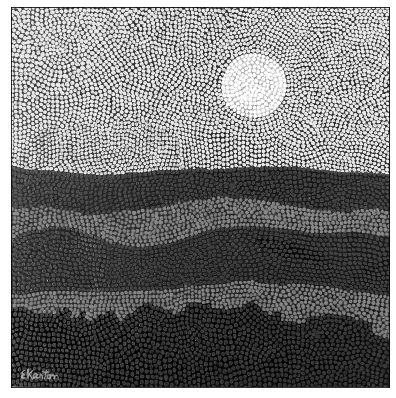

In [7]:
imshow(pintura_puntos)

In [33]:
# Make Umbral score 
def umbral_img(imagen, val_tres):
    """Make umbral score"""
    umbral_name = val_tres.__name__
    if val_tres.__name__ == 'threshold_local':
        umbral_val = val_tres(imagen, block_size=51, method='median')
    else:
        umbral_val = val_tres(imagen)
    img_tres = imagen>umbral_val
    return img_tres, umbral_val, umbral_name

In [34]:
#Umbral list
umbral_list = [threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola]

In [ ]:
# Grid
plt.figure(figsize=(12,8))
dim = int(len(umbral_list) ** 0.5)

for i in range(100):
xdata.append(i)
ydata.append(ysample[i])
line.set_xdata(xdata)
line.set_ydata(ydata)
plt.draw()
plt.pause(1e-17)
time.sleep(0.1)
 
# add this if you don't want the window to disappear at the end
plt.show()

for i,j in enumerate(umbral_list):
    img, us, un = umbral_img(pintura_puntos,j)
    
    # subplot

    plt.subplot(dim,dim,i+1)
    plt.axis('off')
    plt.title(f"{un}")
    plt.imshow(img, cmap=plt.cm.gray)

In [8]:
def umbral_imagen(imagensita, val_tres, **kwargs):
    umbral_name = val_tres.__name__
    umbral = val_tres(image=imagensita,**kwargs)
    img_tres = imagensita>umbral
    return img_tres, umbral, umbral_name

imagencita, umbral_value, umbral_name = umbral_imagen(pintura_puntos,threshold_local, block_size=51, method='median')

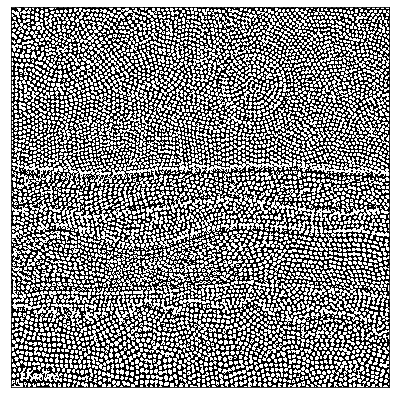

In [9]:
imshow(imagencita)

C:\Users\Hippogryph\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hippogryph\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
C:\Users\Hippogryph\anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this

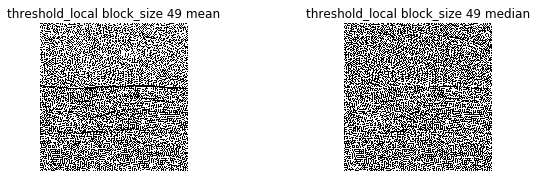

In [10]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
fig.show()

for i in range(7,51,2):
    
    plt.subplot(2,2,1)
    im, uvalue, uname = umbral_imagen(pintura_puntos,threshold_local, block_size=i, method='mean')
    plt.title(f'{uname} block_size {i} mean')
    plt.axis('off')
    plt.imshow(im, cmap=plt.cm.gray)
    
    plt.subplot(2,2,2)
    im2, uvalue2, uname2 = umbral_imagen(pintura_puntos,threshold_local, block_size=i, method='median')
    plt.title(f'{uname2} block_size {i} median')
    plt.axis('off')
    plt.imshow(im2, cmap=plt.cm.gray)

    fig.canvas.draw()
    sleep(0.1)

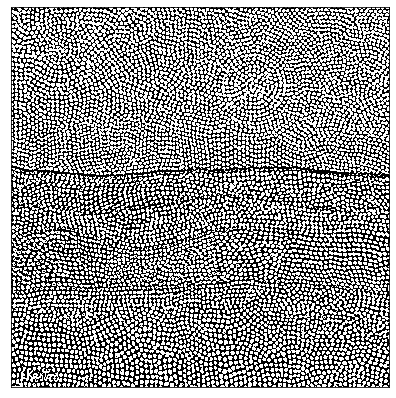

In [42]:
##Adapatativo umbral para cada PIXEL, coge un generico y lo palica para varias imagenes
im, us, un = umbral_imagen(pintura_puntos,threshold_niblack, window_size=31, k=1e-4)
imshow(im)


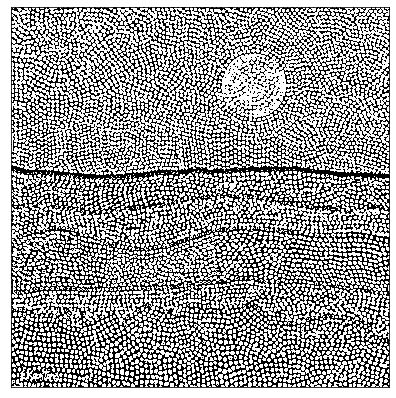

In [66]:
##Adapatativo umbral para cada PIXEL, coge un generico y lo palica para varias imagenes
im, us, un = umbral_imagen(pintura_puntos,threshold_sauvola, window_size=55, k=0.08)
imshow(im)

In [67]:
from skimage.morphology import label
from skimage.measure import regionprops
nlabels = label(im,connectivity=1)
regions = regionprops(nlabels)
print(im.shape)
print(len(nlabels))
print(len(regions))

(1930, 1920)
1930
4672


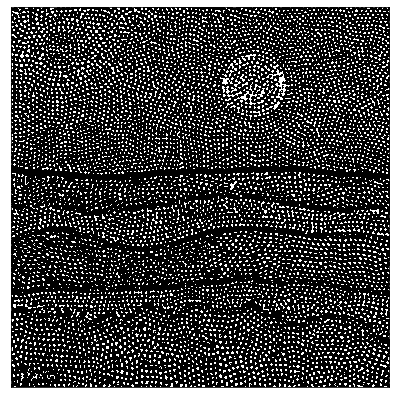

8051


In [68]:
#erosion, dilation, opening, closing
erosion_disk_img = erosion(im,disk(4))
imshow(erosion_disk_img)
nlabels = label(erosion_disk_img,connectivity=1)
regions = regionprops(nlabels)
print(len(regions))

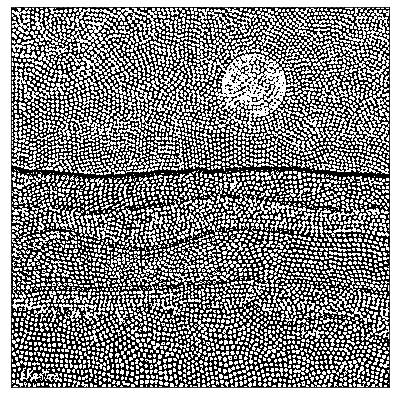

5223


In [23]:
erosion_disk_img = erosion(im,disk(1))
imshow(erosion_disk_img)
nlabels = label(erosion_disk_img,connectivity=1)
regions = regionprops(nlabels)
print(len(regions))

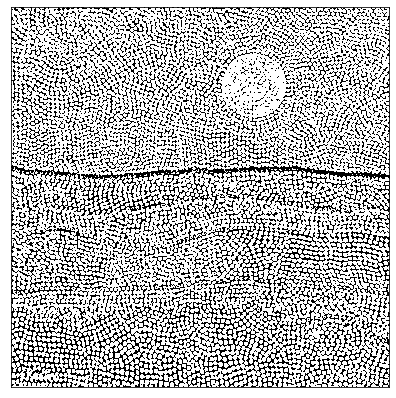

2637


In [26]:
erosion_disk_img = dilation(im,disk(1))
imshow(erosion_disk_img)
nlabels = label(erosion_disk_img,connectivity=1)
regions = regionprops(nlabels)
print(len(regions))

### Contar el numero de puntos primero para comparar

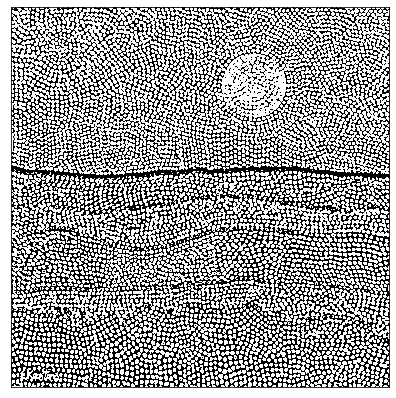

4757


In [28]:
erosion_disk_img = opening(im,disk(2))
imshow(erosion_disk_img)
nlabels = label(erosion_disk_img,connectivity=1)
regions = regionprops(nlabels)
print(len(regions))

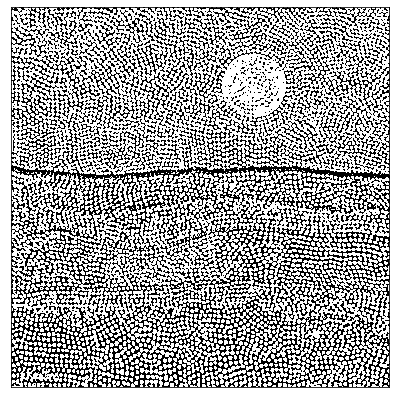

1293


In [32]:
erosion_disk_img = closing(im,disk(2))
imshow(erosion_disk_img)
nlabels = label(erosion_disk_img,connectivity=1)
regions = regionprops(nlabels)
print(len(regions))

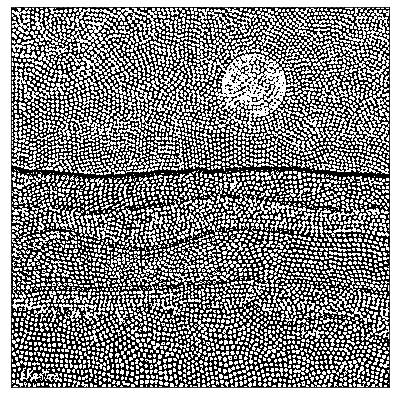

5223


In [36]:
erosion_start_img = erosion(im)
imshow(erosion_start_img)
nlabels = label(erosion_start_img,connectivity=1)
regions = regionprops(nlabels)
print(len(regions))

# Posible resultado

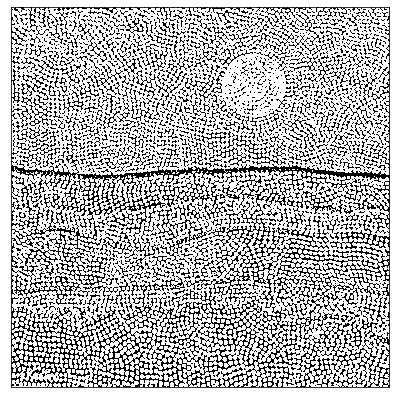

2971


In [70]:
#dilation
dilation_disk_img = dilation(im,disk(1))
imshow(dilation_disk_img)
nlabels = label(dilation_disk_img,connectivity=1)
regions = regionprops(nlabels)
print(len(regions))

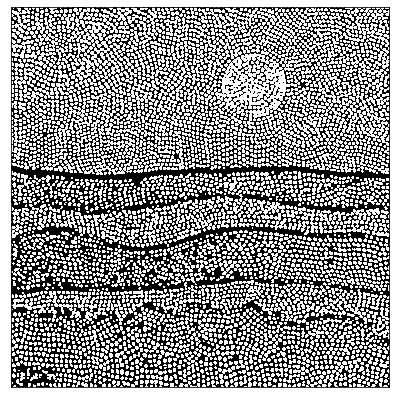

6101


In [77]:
#opening
opening_disk_img = opening(im,disk(5))
imshow(opening_disk_img)
nlabels = label(opening_disk_img,connectivity=1)
regions = regionprops(nlabels)
print(len(regions))

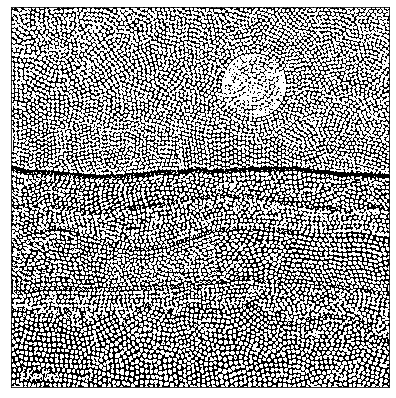

3649


In [81]:
#closing
closing_disk_img = closing(im,disk(1))
imshow(closing_disk_img)
nlabels = label(closing_disk_img,connectivity=1)
regions = regionprops(nlabels)
print(len(regions))

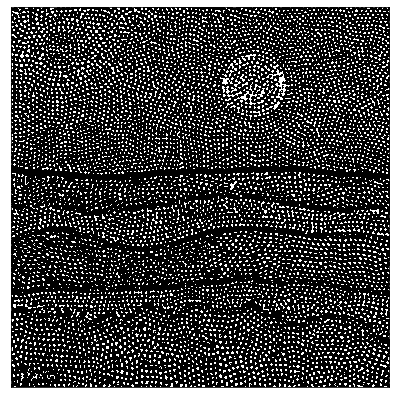

the best algorithm for this image is erosion with 8051 points


In [82]:
#erosion, dilation, opening, closing
erosion_disk_img = erosion(im,disk(4))
imshow(erosion_disk_img)
nlabels = label(erosion_disk_img,connectivity=1)
regions = regionprops(nlabels)
print(f'the best algorithm for this image is erosion with {len(regions)} points')